In [1]:
import mcstasscript as ms
# Reset previous definitions
try:
    del(instrument, source, tof_monitor, l_monitor, data)
except:
    pass

In [ ]:
name = 'test_PSI_Source_custom'
instrument = ms.McStas_instr(
    name,
    author = 'Pablo Gila-Herranz',
    origin = 'Materials Physics Center (CFM-MPC), CSIC-UPV/EHU',
    ncount = 1e8,
    mpi = 4,
    output_path = f'_simulations/{name}',
    input_path = '_simulations',
    )

In [3]:
instrument.available_components('monitors')
instrument.component_help('Source_custom')
instrument.component_help('TOF_monitor')
instrument.component_help('L_monitor')

Here are all components in the monitors category.
 Brilliance_monitor     Flex_monitor_1D         PSD_monitor_4PI        Res_monitor
 Cyl_monitor            Flex_monitor_2D         PSD_monitor_4PI_spin   Sqq_w_monitor
 Cyl_monitor_PSD        Flex_monitor_3D         PSD_monitor_TOF        Sqw_monitor
 Cyl_monitor_TOF        L_monitor               PSD_monitor_psf        TOF2E_monitor
 Div1D_monitor          MeanPolLambda_monitor   PSD_monitor_psf_eff    TOF2Q_cylPSD_monitor
 DivLambda_monitor      Monitor                 PSDcyl_monitor         TOFLambda_monitor
 DivPos_monitor         Monitor_4PI             PSDlin_diff_monitor    TOFRes_monitor
 Divergence_monitor     Monitor_nD              PSDlin_monitor         TOF_PSD_monitor_rad
 EPSD_monitor           Monitor_nD_noacc        PolLambda_monitor      TOF_cylPSD_monitor
 E_monitor              PSD_TOF_monitor         Pol_monitor            TOF_monitor
 Event_monitor_simple   PSD_monitor             PreMonitor_nD          TOFlog_monit

In [4]:
source = instrument.add_component("source", "Source_custom")
tof_monitor = instrument.add_component("TOF_monitor", "TOF_monitor")
l_monitor = instrument.add_component("L_monitor", "L_monitor")

In [18]:
# Parameters from the ESS butterfly moderator for testing purposes

xw = 0.1
yh = 0.1
dist = 10.0
Lmin = 0.2
Lmax = 10
freq = 1

source.set_parameters(
    target_index = 1,
    focus_xw = xw,
    focus_yh = yh,
    Lmin = Lmin,
    Lmax = Lmax,
    freq = freq,
    t_pulse = 1/freq,
    T1 = 296.2,
    I1 = 8.5e+11,
    T2 = 40.68,
    I2 = 5.2e+11,
    )
source.set_AT([0,0,0])

tof_monitor.set_parameters(
    nt = 100,
    xwidth = xw,
    yheight = yh,
    tmin = 0.0,
    tmax = 1.0e+6,
    restore_neutron = 1,
    )
tof_monitor.set_AT(dist)

l_monitor.set_parameters(
    nL = 100,
    xwidth = xw,
    yheight = yh,
    Lmin = Lmin,
    Lmax = Lmax,
    restore_neutron = 1,
    )
l_monitor.set_AT(dist)

In [19]:
data = instrument.backengine()

---- Found 1 places in McStas output with keyword 'error'. 

[slimbook:22289] Set MCA parameter "orte_base_help_aggregate" to 0 to see all help / error messages
*** TRACE end *** 
Detector: TOF_monitor_I=4.23644e+08 TOF_monitor_ERR=70575.9 TOF_monitor_N=9.87094e+07 "TOF_monitor.dat"
Detector: L_monitor_I=4.26345e+08 L_monitor_ERR=70724.8 L_monitor_N=1e+08 "L_monitor.dat"
INFO: Placing instr file copy test_Source_custom.instr in dataset /home/pablo/OneDrive/Documents/work/PhD/_data/McStas/Source_custom/_simulations/test_Source_custom_27
INFO: Placing generated c-code copy test_Source_custom.c in dataset /home/pablo/OneDrive/Documents/work/PhD/_data/McStas/Source_custom/_simulations/test_Source_custom_27

----------------------------------------------------------------------

INFO: Using directory: "/home/pablo/OneDrive/Documents/work/PhD/_data/McStas/Source_custom/_simulations/test_Source_custom_27"
INFO: Regenerating c-file: test_Source_custom.c
CFLAGS=

-------------------------------

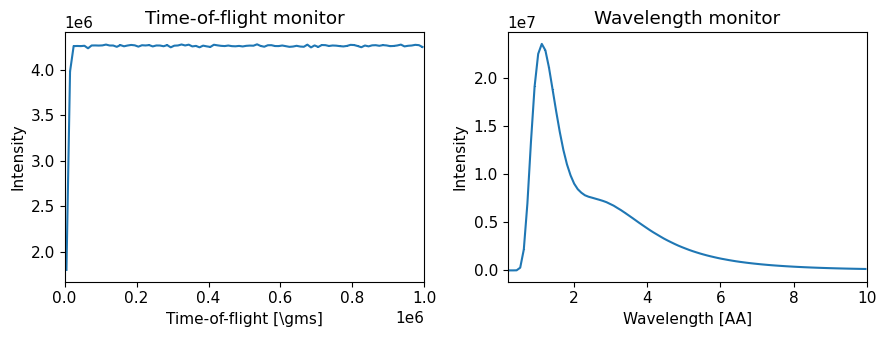

In [20]:
ms.make_sub_plot(data, log = False)